In [114]:
___Author___='LumberJack Jyss'

# LSTM FROM KEREAS

In [115]:
#importing required libraries
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import *
from keras.layers import *
from keras.utils.vis_utils import plot_model as plot
from matplotlib.legend_handler import HandlerLine2D

In [116]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [117]:
# Setting the data
start = pd.to_datetime('2016-03-31')
end = pd.to_datetime('2019-03-19')

In [118]:
data = web.DataReader('AMZN','yahoo',start,end)
#spy_etf = web.DataReader('SPY','yahoo',start,end)
X = data
y = data['Adj Close']
y = y.to_frame()
X = X.drop(['Low','Close','Adj Close'],axis=1)
X.tail()

,High,Open,Volume
Date,,,
2019-03-13,1700.000000,1683.000000,3552000
2019-03-14,1702.000000,1691.199951,2946600
2019-03-15,1718.800049,1703.000000,7550900
2019-03-18,1750.000000,1712.699951,5429100
2019-03-19,1784.160034,1753.510010,6364200


In [119]:
y.head()

,Adj Close
Date,
2016-03-31,593.640015
2016-04-01,598.500000
2016-04-04,593.190002
2016-04-05,586.140015
2016-04-06,602.080017


In [120]:
X_train = X.iloc[:600,:]
X_test = X.iloc[600:,:]
X_train.tail(),X_test.head(),X_train.isnull().sum().sum(),X_test.isnull().sum().sum()

(                   High         Open   Volume
 Date                                         
 2018-08-09  1914.569946  1882.000000  4849900
 2018-08-10  1899.500000  1888.510010  3639900
 2018-08-13  1925.000000  1898.500000  5512600
 2018-08-14  1921.010010  1919.390015  3986100
 2018-08-15  1916.209961  1909.550049  7700700,
                    High         Open   Volume
 Date                                         
 2018-08-16  1905.000000  1903.939941  3957100
 2018-08-17  1888.000000  1885.800049  4104300
 2018-08-20  1891.750000  1890.569946  2862000
 2018-08-21  1897.750000  1880.000000  3105600
 2018-08-22  1905.800049  1876.640015  3080500,
 0,
 0)

In [121]:
y_train = y.iloc[:600,:]
y_test = y.iloc[600:,:]
y_train.tail(),y_test.head(),y_train.isnull().sum().sum(),X_test.isnull().sum().sum()

(              Adj Close
 Date                   
 2018-08-09  1898.520020
 2018-08-10  1886.300049
 2018-08-13  1896.199951
 2018-08-14  1919.650024
 2018-08-15  1882.619995,               Adj Close
 Date                   
 2018-08-16  1886.520020
 2018-08-17  1882.219971
 2018-08-20  1876.709961
 2018-08-21  1883.420044
 2018-08-22  1904.900024, 0, 0)

In [122]:
input_tensor = Input((1,3,))
input_tensor

<tf.Tensor 'input_8:0' shape=(?, 1, 3) dtype=float32>

In [123]:
x = input_tensor
for i in range(2):
    x = Bidirectional(LSTM(32*2**i,return_sequences=True))(x)
    x = Activation('relu')(x)
x = Bidirectional(LSTM(512,return_sequences=False))(x)
x = Activation('relu')(x)
x = Dense(1,activation='linear')(x)
x = PReLU(alpha_initializer='zeros',\
         alpha_regularizer=None,\
         alpha_constraint=None,\
         shared_axes=None)(x)

In [124]:
model = Model(input=input_tensor,output=x)

/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("p_...)`
  """Entry point for launching an IPython kernel.


In [125]:
#Adamax = Adam(lr=0.000074)
model.compile(loss='mse',optimizer='Adamax')

In [126]:
#plot(model,to_file='model.png',show_shapes=True)
#plt.show()

In [127]:
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [131]:
X_train.shape[0],y_train.shape[1],X_test[0],y_test[1]

KeyError: 1

In [91]:
model.fit(X_train, y_train,batch_size=100,epochs=10)

ValueError: Error when checking input: expected input_5 to have shape (3, 1) but got array with shape (1, 3)

In [36]:
predicted = model.predict(X_test)
predicted

ValueError: Error when checking input: expected input_2 to have 3 dimensions, but got array with shape (147, 3)

In [37]:
predicted = np.reshape(predicted,(predicted.size))
var = variance(predicted,y_test)

NameError: name 'predicted' is not defined

AttributeError: Unknown property figsize

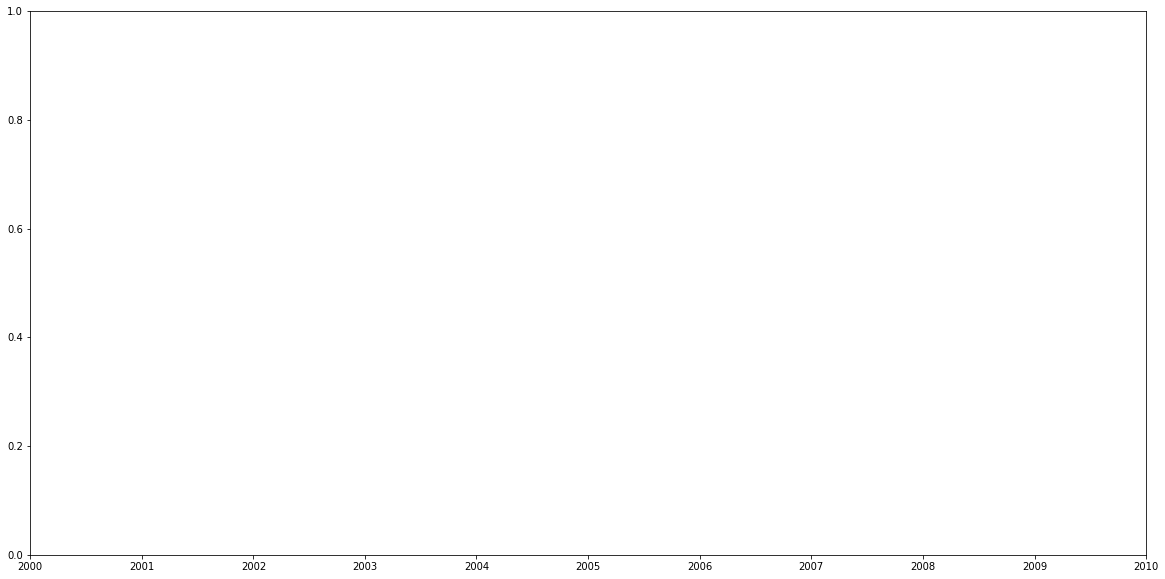

In [38]:
line1, = plt.plot(y_test,marker='d',label='Actual',figsize=(16,6))
line1, = plt.plot(y_test,marker='O',label='Predicted')

In [94]:
X_train.shape

(600, 1, 3)